In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import imghdr

/var/folders/tk/g8r2_d7531981gcgw9d39_n80000gn/T/ipykernel_639/2092809802.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    if not image_class.startswith('.'):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))

libpng warning: iCCP: known incorrect sRGB profile


In [5]:
previews = []
for image_class in os.listdir(data_dir):
    if not image_class.startswith('.'):
        # Get the path to the first image in the directory
        image_path = os.path.join(data_dir, image_class)
        for image_file in os.listdir(image_path):
            if not image_file.startswith('.'):
                image_file_path = os.path.join(image_path, image_file)
                # Read the image
                image = cv2.imread(image_file_path)
                if image is not None:
                    # Add the image to the list
                    previews.append(image)
                break 

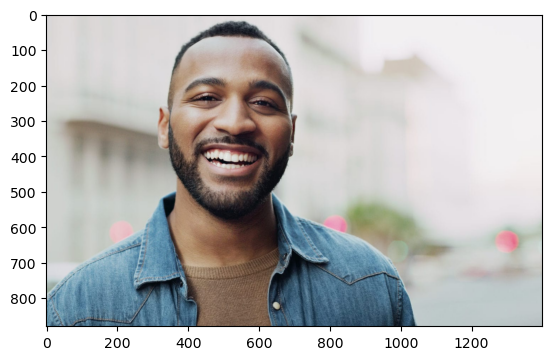

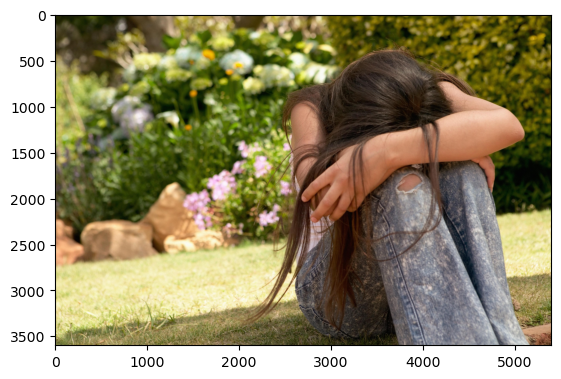

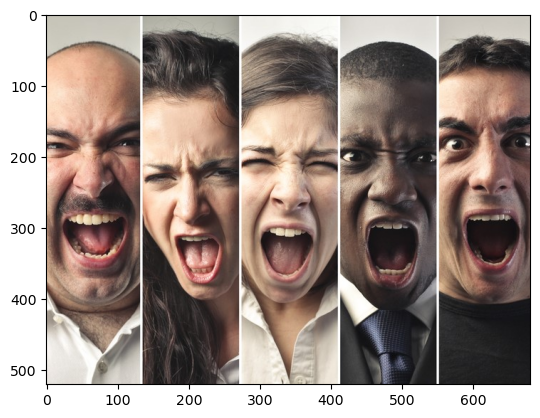

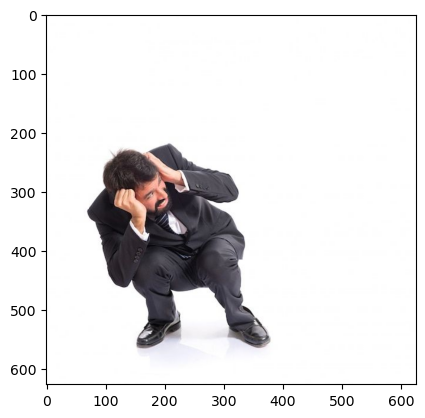

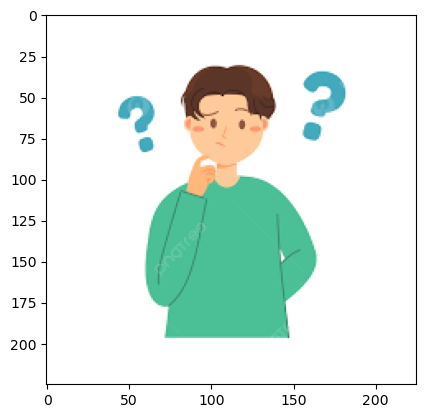

In [6]:
for img in previews:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Loading The Data with a Pipeline

In [53]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 428 files belonging to 5 classes.


In [35]:
data_iterator = data.as_numpy_iterator()

In [36]:
batch = data_iterator.next()

2024-02-29 11:08:26.281553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


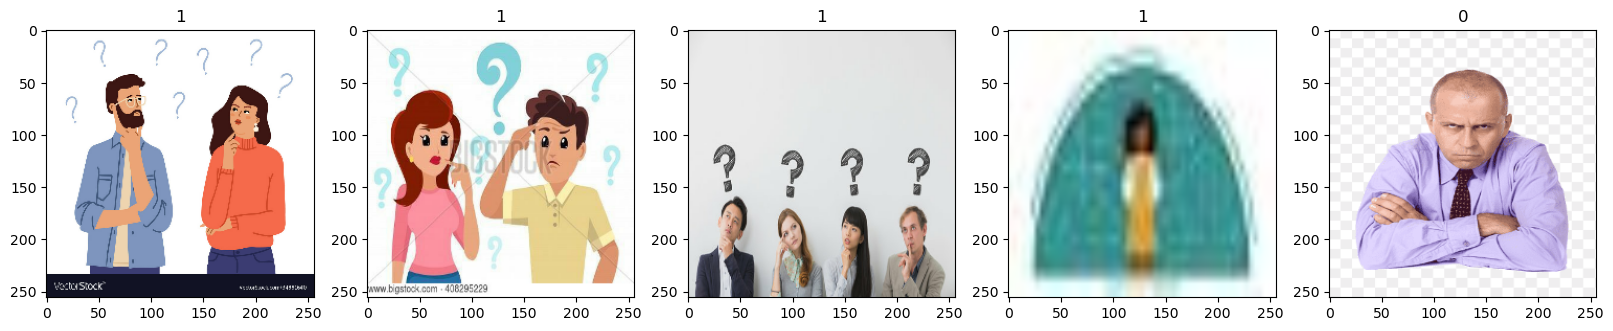

In [37]:
#0 angry, 1 confused, 2 happy 3 sad, 4 scared
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess within the pipeline

Scale Data

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [60]:
batch = data.as_numpy_iterator().next()

Split the Data

In [59]:
len(data)

14

In [55]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [56]:
print(train_size)
print(val_size)
print(test_size)

9
3
2


In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build the Deep Learning Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [64]:
cnn = Sequential()

cnn.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(32, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(16, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(5, activation='sigmoid'))

In [65]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

Training

In [67]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist = cnn.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
2/9 [=====>........................] - ETA: 1s - loss: 2.4830 - accuracy: 0.1719 

2024-02-29 11:47:25.598212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.9744 - accuracy: 0.1840

2024-02-29 11:47:28.416749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 427ms/step - loss: 1.9744 - accuracy: 0.1840 - val_loss: 1.5903 - val_accuracy: 0.3021
Epoch 2/20
2/9 [=====>........................] - ETA: 2s - loss: 1.5803 - accuracy: 0.3438

2024-02-29 11:47:30.286178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.5867 - accuracy: 0.2986

2024-02-29 11:47:33.198831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 445ms/step - loss: 1.5867 - accuracy: 0.2986 - val_loss: 1.5503 - val_accuracy: 0.4375
Epoch 3/20
2/9 [=====>........................] - ETA: 2s - loss: 1.5717 - accuracy: 0.3438 

2024-02-29 11:47:35.172791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.5253 - accuracy: 0.3854

2024-02-29 11:47:37.969728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 428ms/step - loss: 1.5253 - accuracy: 0.3854 - val_loss: 1.3624 - val_accuracy: 0.5625
Epoch 4/20
2/9 [=====>........................] - ETA: 2s - loss: 1.4005 - accuracy: 0.4688

2024-02-29 11:47:39.826192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.3627 - accuracy: 0.4792

2024-02-29 11:47:42.713011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 442ms/step - loss: 1.3627 - accuracy: 0.4792 - val_loss: 1.3313 - val_accuracy: 0.6250
Epoch 5/20
2/9 [=====>........................] - ETA: 2s - loss: 1.3191 - accuracy: 0.6719 

2024-02-29 11:47:44.735082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.2109 - accuracy: 0.6215

2024-02-29 11:47:47.607029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 436ms/step - loss: 1.2109 - accuracy: 0.6215 - val_loss: 1.0818 - val_accuracy: 0.6771
Epoch 6/20
2/9 [=====>........................] - ETA: 1s - loss: 0.9931 - accuracy: 0.6719

2024-02-29 11:47:49.463408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.9575 - accuracy: 0.6597

2024-02-29 11:47:52.285743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 434ms/step - loss: 0.9575 - accuracy: 0.6597 - val_loss: 0.7020 - val_accuracy: 0.8229
Epoch 7/20
2/9 [=====>........................] - ETA: 1s - loss: 0.7439 - accuracy: 0.8281 

2024-02-29 11:47:54.260895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.7882

2024-02-29 11:47:57.132166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 433ms/step - loss: 0.6831 - accuracy: 0.7882 - val_loss: 0.4624 - val_accuracy: 0.8750
Epoch 8/20
2/9 [=====>........................] - ETA: 1s - loss: 0.4385 - accuracy: 0.8906 

2024-02-29 11:47:59.001394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.8715

2024-02-29 11:48:01.876521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 436ms/step - loss: 0.4407 - accuracy: 0.8715 - val_loss: 0.3511 - val_accuracy: 0.9062
Epoch 9/20
2/9 [=====>........................] - ETA: 2s - loss: 0.2910 - accuracy: 0.9531 

2024-02-29 11:48:03.804491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2807 - accuracy: 0.9340

2024-02-29 11:48:06.733911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 444ms/step - loss: 0.2807 - accuracy: 0.9340 - val_loss: 0.2810 - val_accuracy: 0.8958
Epoch 10/20
2/9 [=====>........................] - ETA: 2s - loss: 0.1817 - accuracy: 0.9375

2024-02-29 11:48:08.604442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1724 - accuracy: 0.9618

2024-02-29 11:48:11.401828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 431ms/step - loss: 0.1724 - accuracy: 0.9618 - val_loss: 0.2052 - val_accuracy: 0.9375
Epoch 11/20
2/9 [=====>........................] - ETA: 2s - loss: 0.1344 - accuracy: 0.9688 

2024-02-29 11:48:13.386350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1357 - accuracy: 0.9826

2024-02-29 11:48:16.378792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 455ms/step - loss: 0.1357 - accuracy: 0.9826 - val_loss: 0.1452 - val_accuracy: 0.9792
Epoch 12/20
2/9 [=====>........................] - ETA: 1s - loss: 0.0415 - accuracy: 1.0000

2024-02-29 11:48:18.228450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1031 - accuracy: 0.9861

2024-02-29 11:48:21.034570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 428ms/step - loss: 0.1031 - accuracy: 0.9861 - val_loss: 0.0651 - val_accuracy: 0.9896
Epoch 13/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0534 - accuracy: 1.0000 

2024-02-29 11:48:23.015913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9931

2024-02-29 11:48:25.966195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 444ms/step - loss: 0.0423 - accuracy: 0.9931 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 14/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0415 - accuracy: 1.0000

2024-02-29 11:48:27.849120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 1.0000

2024-02-29 11:48:30.698766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 436ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 15/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0388 - accuracy: 1.0000 

2024-02-29 11:48:32.658347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9931

2024-02-29 11:48:35.639446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 455ms/step - loss: 0.0292 - accuracy: 0.9931 - val_loss: 0.0489 - val_accuracy: 0.9896
Epoch 16/20
2/9 [=====>........................] - ETA: 1s - loss: 0.0651 - accuracy: 0.9844 

2024-02-29 11:48:37.513383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9965

2024-02-29 11:48:40.321959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 426ms/step - loss: 0.0318 - accuracy: 0.9965 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 17/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0153 - accuracy: 1.0000 

2024-02-29 11:48:42.249256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9965

2024-02-29 11:48:45.211978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 450ms/step - loss: 0.0171 - accuracy: 0.9965 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 18/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0194 - accuracy: 1.0000 

2024-02-29 11:48:47.138485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 1.0000

2024-02-29 11:48:49.951563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 434ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 19/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0148 - accuracy: 1.0000 

2024-02-29 11:48:51.852126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 1.0000

2024-02-29 11:48:54.851177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 453ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 20/20
2/9 [=====>........................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000     

2024-02-29 11:48:56.771879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

2024-02-29 11:48:59.583420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 430ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000


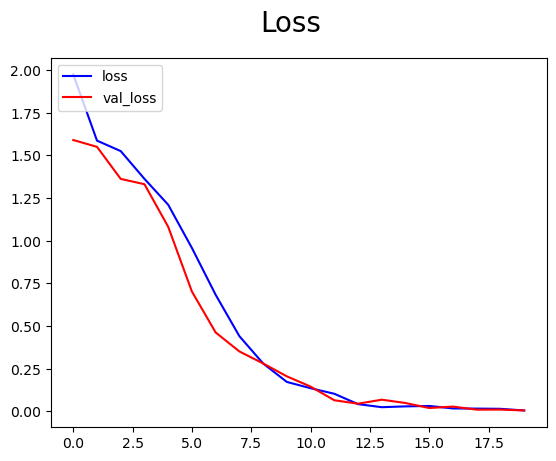

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

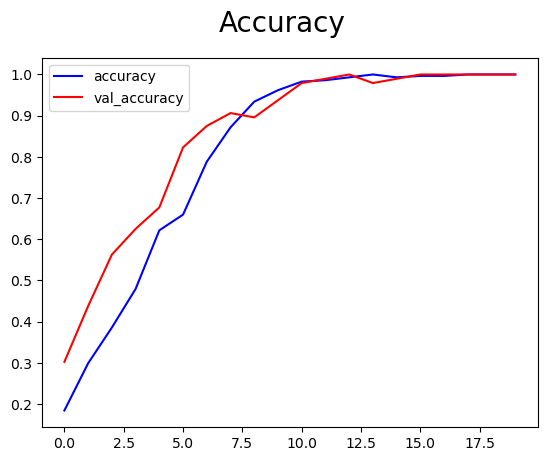

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluate the model

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre = Precision(top_k=1)
re = Recall()
acc = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = cnn.predict(X) 

2024-02-29 12:03:44.740133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 49ms/step


In [82]:
cnn.evaluate(X, y)

1/1 [==============================] - 0s 42ms/step - loss: 0.0061 - accuracy: 1.0000


[0.006096323486417532, 1.0]

1/1 [==============================] - 0s 31ms/step


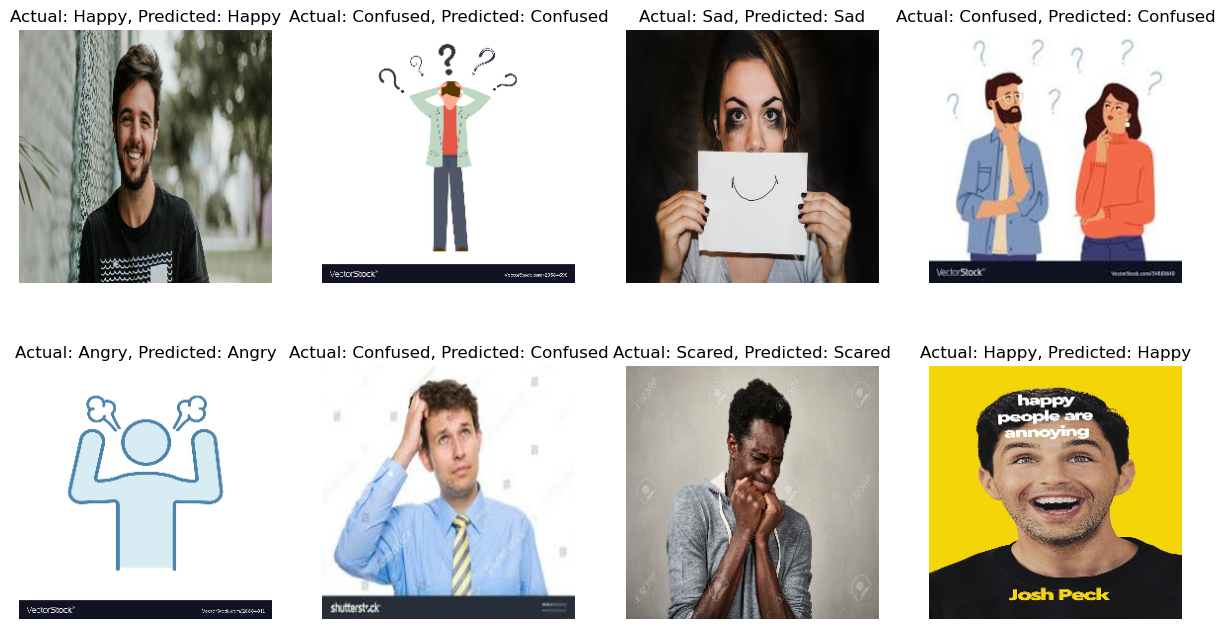

In [94]:
#0 angry, 1 confused, 2 happy 3 sad, 4 scared
emotions = ['Angry', 'Confused', 'Happy', 'Sad', 'Scared']
predictions = cnn.predict([X[:8]])
plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X[i])
    plt.axis('off')

    predicted_label = np.argmax(predictions[i])
    predicted_label = emotions[predicted_label]
    actual_label = emotions[y[i]]
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')

plt.show()